# 2. Fancy Tricks with Simple Numbers

## Dealing with Counts

### FIXED-WIDTH BINNING

In [5]:
import numpy as np

# Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
small_counts

array([18,  4, 41, 79, 28, 41, 19, 57, 57, 39, 37,  2, 16, 26, 95, 89, 71,
       94, 87, 93])

In [6]:
# Map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([1, 0, 4, 7, 2, 4, 1, 5, 5, 3, 3, 0, 1, 2, 9, 8, 7, 9, 8, 9])

In [7]:
# An array of counts that span several magnitudes
>>> large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 
...                 44, 28, 7971, 926, 122, 22222]

In [8]:
# Map to exponential-width bins via the log function
>>> np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### QUANTILE BINNING

In [14]:
# Continue example 2-3 with large_counts
>>> import pandas as pd

# Map the counts to quartiles
>>> pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [12]:
# Compute the quantiles themselves
>>> large_counts_series = pd.Series(large_counts)
>>> large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## Log Transformation

In [18]:
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [33]:
df.shape

(39644, 62)

In [27]:
# Take the log transform of the 'n_tokens_content' feature, which 
# represents the number of words (tokens) in a news article.
df['log_n_tokens_content'] = np.log10(df[' n_tokens_content'] + 1)

Text(0, 0.5, 'Number of Articles')

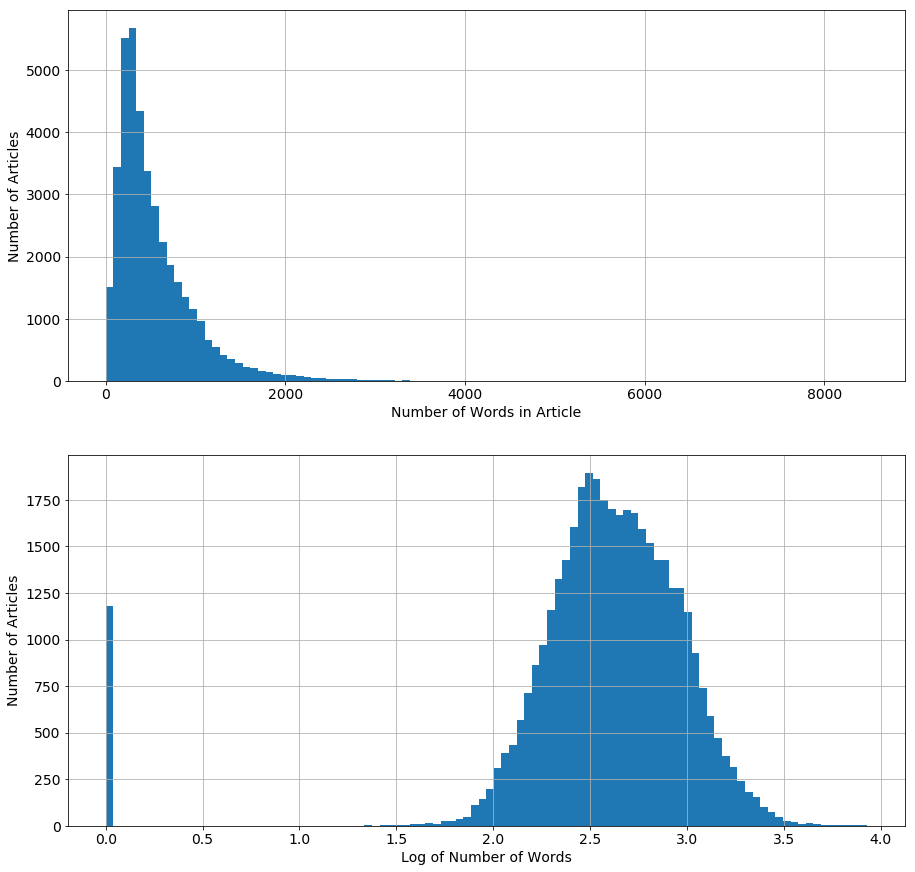

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))

df[' n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)